# Homework 9
## Classification
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import numpy as np

## Part I - Classification

In [48]:
file_name = 'CreditCardData.csv'
df = pd.read_csv(file_name)
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


### Q1
Clean the data


In [49]:
df = df.replace('?', np.NaN)
df = df.dropna()

df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


### Q2

Fix the Approved column


In [50]:
df['Approved'].replace({'-': 0, '+': 1}, inplace=True)

### Q3 and Q4

Split the data into training and testing sets, and set the seed

In [51]:
columns_to_convert = ['Age', 'ZipCode']
df[columns_to_convert] = df[columns_to_convert].astype(float)

non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()

In [52]:
non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
df1 = pd.get_dummies(df, columns=non_numeric_cols)
dTrain, dTest = train_test_split(df1, test_size=0.3, random_state=99)

### Q5

Classification model to predict Approved status using Decision Tree

In [53]:
X = df1.drop(columns=['Approved'])
Y = df1['Approved']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

decTree = DecisionTreeClassifier(random_state=99)
model = decTree.fit(x_train, y_train)

feature_importances = model.feature_importances_
model.feature_importances_

array([0.05573891, 0.08281139, 0.02040212, 0.00671275, 0.06674618,
       0.06299288, 0.        , 0.01294875, 0.        , 0.        ,
       0.        , 0.        , 0.01546751, 0.00734207, 0.        ,
       0.0201675 , 0.00174273, 0.        , 0.00709034, 0.        ,
       0.00122405, 0.        , 0.01037337, 0.00667461, 0.00964958,
       0.        , 0.        , 0.00580144, 0.02535719, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.51199466, 0.        , 0.        ,
       0.05106232, 0.01769964, 0.        , 0.        , 0.        ,
       0.        ])

In [54]:
train_pred = model.predict(x_train)
train_pred

train_acc = (accuracy_score(train_pred, y_train) * 100)
train_acc

100.0

In [55]:
test_pred = model.predict(x_test)
test_pred

test_acc = (accuracy_score(test_pred, y_test) * 100)
test_acc

83.16326530612244

### Q6

TreePruning Analysis

In [56]:
treeRepr = export_text(model, feature_names=X.columns)
print(treeRepr)

|--- PriorDefault_f <= 0.50
|   |--- Employed_t <= 0.50
|   |   |--- ZipCode <= 75.00
|   |   |   |--- Debt <= 22.04
|   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Income >  100.00
|   |   |   |   |   |--- Income <= 262.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Income >  262.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Debt >  22.04
|   |   |   |   |--- class: 0
|   |   |--- ZipCode >  75.00
|   |   |   |--- Income <= 125.00
|   |   |   |   |--- Age <= 37.46
|   |   |   |   |   |--- Age <= 33.29
|   |   |   |   |   |   |--- Debt <= 10.75
|   |   |   |   |   |   |   |--- Debt <= 2.52
|   |   |   |   |   |   |   |   |--- EducationLevel_c <= 0.50
|   |   |   |   |   |   |   |   |   |--- EducationLevel_e <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- EducationLevel_q <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- EducationLevel_q >  0.50
|

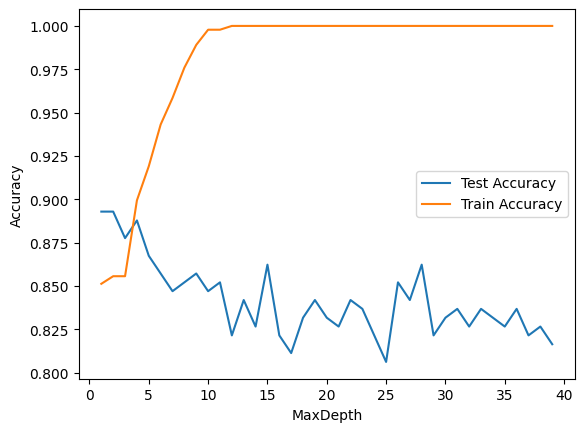

In [57]:
max_depth = []
test_acc = []
train_acc = []
for i in range(1,40):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    tpred = dtree.predict(x_train)
    test_acc.append(accuracy_score(y_test, pred))
    train_acc.append(accuracy_score(y_train, tpred))
    max_depth.append(i)
d = pd.DataFrame({
    'Test Accuracy':pd.Series(test_acc),
    'Train Accuracy':pd.Series(train_acc),
    'MaxDepth':pd.Series(max_depth)
     })
plt.plot('MaxDepth','Test Accuracy', data=d)
plt.plot('MaxDepth','Train Accuracy', data=d)
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.legend()

Initial training and testing yielded 100% and 83% accuracy respectively. This is a clear case of overfitting which is caused by an overly intricate and deep decision tree.

To understand the effect of the tree depth on the accuracy, I ran the model for different depths and plotted the results. We can clealy see that the accuracy on the training set reaches 100% at depth 10 and remains there. However, the accuracy on the testing set has a negative correlation with the depth. This is a clear case of overfitting.

In [58]:
decTree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=99)
decModel = decTree.fit(x_train, y_train)

train_pred = decModel.predict(x_train)
train_acc = accuracy_score(y_train, train_pred) * 100

test_pred = decModel.predict(x_test)
test_acc = accuracy_score(y_test, test_pred) * 100

accuracy_difference = train_acc - test_acc

print(f'Training Accuracy = {train_acc:.2f}%\nTesting Accuracy = {test_acc:.2f}%\ndifference = {accuracy_difference:.2f}%')

Training Accuracy = 91.90%
Testing Accuracy = 85.20%
difference = 6.70%


Post-pruning, the training accuracy experienced a decrease, settling at 91.90%. Nevertheless, a substantial improvement was noticed in the form of a significantly diminished discrepancy between training and testing accuracies, amounting to a mere 6.7%. This outcome underscores the efficacy of pruning in mitigating overfitting, allowing the model to concentrate on the most precise and pivotal features for improved performance.

### Q7

Classification model to predict Approved status using Random Forest

nEstimator = 1, Training Accuracy = 93.22%, Testing Accuracy = 86.22%, difference = 6.99%
nEstimator = 10, Training Accuracy = 98.69%, Testing Accuracy = 88.78%, difference = 9.91%
nEstimator = 19, Training Accuracy = 99.78%, Testing Accuracy = 91.84%, difference = 7.94%
nEstimator = 28, Training Accuracy = 100.00%, Testing Accuracy = 91.33%, difference = 8.67%


nEstimator = 37, Training Accuracy = 100.00%, Testing Accuracy = 90.31%, difference = 9.69%
nEstimator = 46, Training Accuracy = 100.00%, Testing Accuracy = 91.33%, difference = 8.67%
nEstimator = 55, Training Accuracy = 100.00%, Testing Accuracy = 91.84%, difference = 8.16%
nEstimator = 64, Training Accuracy = 100.00%, Testing Accuracy = 90.31%, difference = 9.69%
nEstimator = 73, Training Accuracy = 100.00%, Testing Accuracy = 91.84%, difference = 8.16%
nEstimator = 82, Training Accuracy = 100.00%, Testing Accuracy = 91.84%, difference = 8.16%
nEstimator = 91, Training Accuracy = 100.00%, Testing Accuracy = 91.84%, difference = 8.16%
nEstimator = 100, Training Accuracy = 100.00%, Testing Accuracy = 91.33%, difference = 8.67%
nEstimator = 109, Training Accuracy = 100.00%, Testing Accuracy = 91.33%, difference = 8.67%
nEstimator = 118, Training Accuracy = 100.00%, Testing Accuracy = 91.33%, difference = 8.67%
nEstimator = 127, Training Accuracy = 100.00%, Testing Accuracy = 91.33%, dif

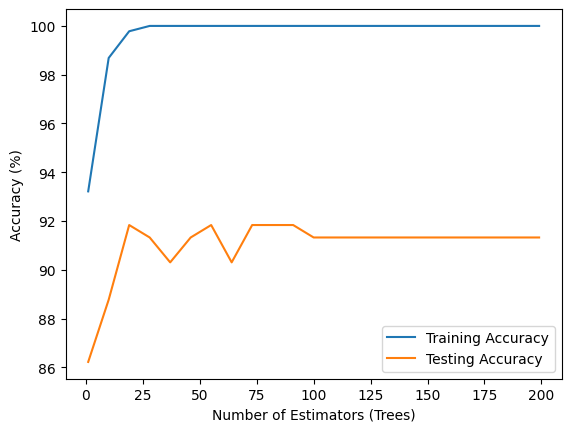

In [59]:
train_accuracies = []
test_accuracies = []
numTrees = range(1, 200, 9)
for i in numTrees:
    forest = RandomForestClassifier(n_estimators=i, random_state=99)
    model = forest.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred) * 100
    
    test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred) * 100
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f'nEstimator = {i}, Training Accuracy = {train_acc:.2f}%, Testing Accuracy = {test_acc:.2f}%, difference = {train_acc - test_acc:.2f}%')

plt.plot(numTrees, train_accuracies, label='Training Accuracy')
plt.plot(numTrees, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [60]:
forest = RandomForestClassifier(n_estimators=55, random_state=99)
forestModel = forest.fit(x_train, y_train)
train_pred = forestModel.predict(x_train)
test_pred = forestModel.predict(x_test)

Text(0.5, 0, 'Feature Importance Plot')

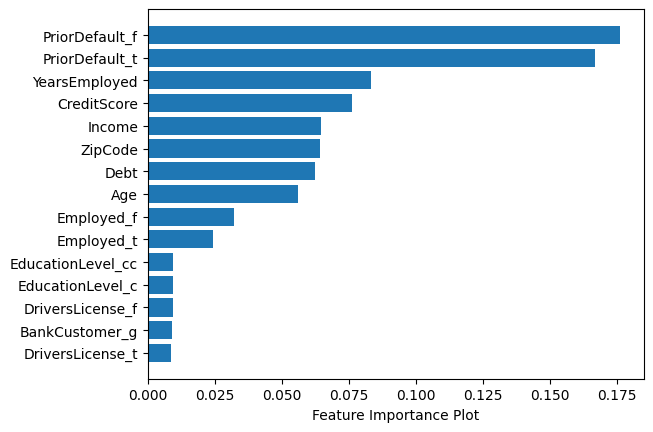

In [61]:
sorted_idx = forestModel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx])[31:47], forestModel.feature_importances_[sorted_idx][31:47])
plt.xlabel("Feature Importance Plot")

For the selection of the optimal number of trees, there were a number of acceptable values such as 1 and 19 that yielded the smallest difference between training and testing accuracies. However, the value of 55 was chosen as it had a modest difference of 8.16% between the two accuracies, and it also had the highest testing accuracy of 91.84%.

### Q8

Comparison of Decision Tree and Random Forest

A decision tree combines some decisions, whereas a random forest combines several decision trees. Thus, it is a long process, yet slow. Whereas, a decision tree is fast and operates easily on large data sets, especially the linear one.

In terms of Classification performance we can see that Random Forest has archieved higher amount of accuracy of 91.84% while Decission tree was only able to get 85.20%. Random Forest used 55 decission trees and came up with this accuracy.  

In [62]:
treeScores = cross_val_score(decModel, X, Y, cv=5)
forestScores = cross_val_score(forestModel, X, Y, cv=5)
print(f'Average CV score for Decision Tree = {treeScores.mean()}\nAverage CV for Random Forest = {forestScores.mean()}')

Average CV score for Decision Tree = 0.8238637698179684
Average CV for Random Forest = 0.8422548443922491


We can see that Decission tree model has lower score which means that model is overfitted a bit whereas Random Froest Model Score is higher than Dt model which means that there is slightly improvement in the random forest fitting.  

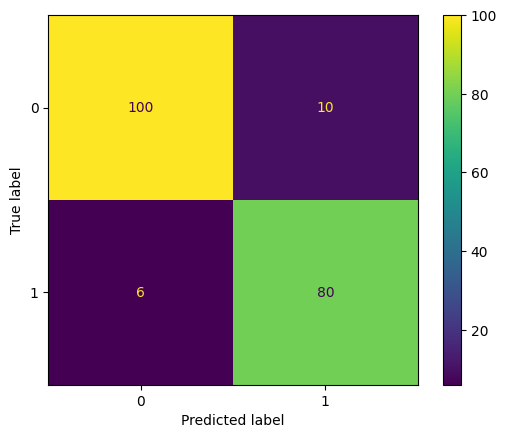

In [63]:
trainingMatrix = confusion_matrix(y_train, train_pred)
testingMatrix = confusion_matrix(y_test, test_pred)
cp = ConfusionMatrixDisplay(testingMatrix, display_labels = forestModel.classes_)
cp.plot(cmap='viridis')

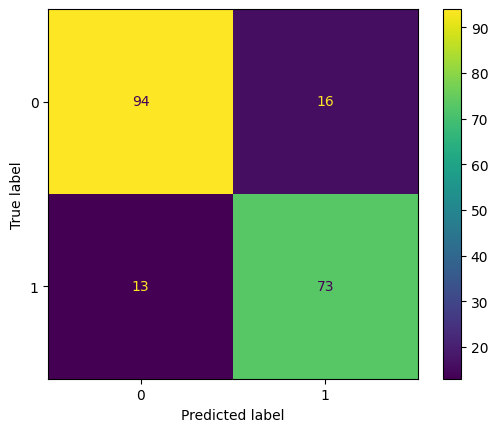

In [64]:
train_pred = decModel.predict(x_train)
test_pred = decModel.predict(x_test)
trainingMatrix = confusion_matrix(y_train, train_pred)
testingMatrix = confusion_matrix(y_test, test_pred)
cp = ConfusionMatrixDisplay(testingMatrix, display_labels = decModel.classes_)
cp.plot(cmap='viridis')

We can see the accuracy difference between the two models in the confusion matrices. We can see that Decision Tree misclassified a total of 29 values whereas Random Forest misclassified only 16 values.

## Part II - Recommendation

In [65]:
data = pd.read_csv('mcdonalds.csv')

### Q1

Decision Tree to recommend similar food based on their attributes

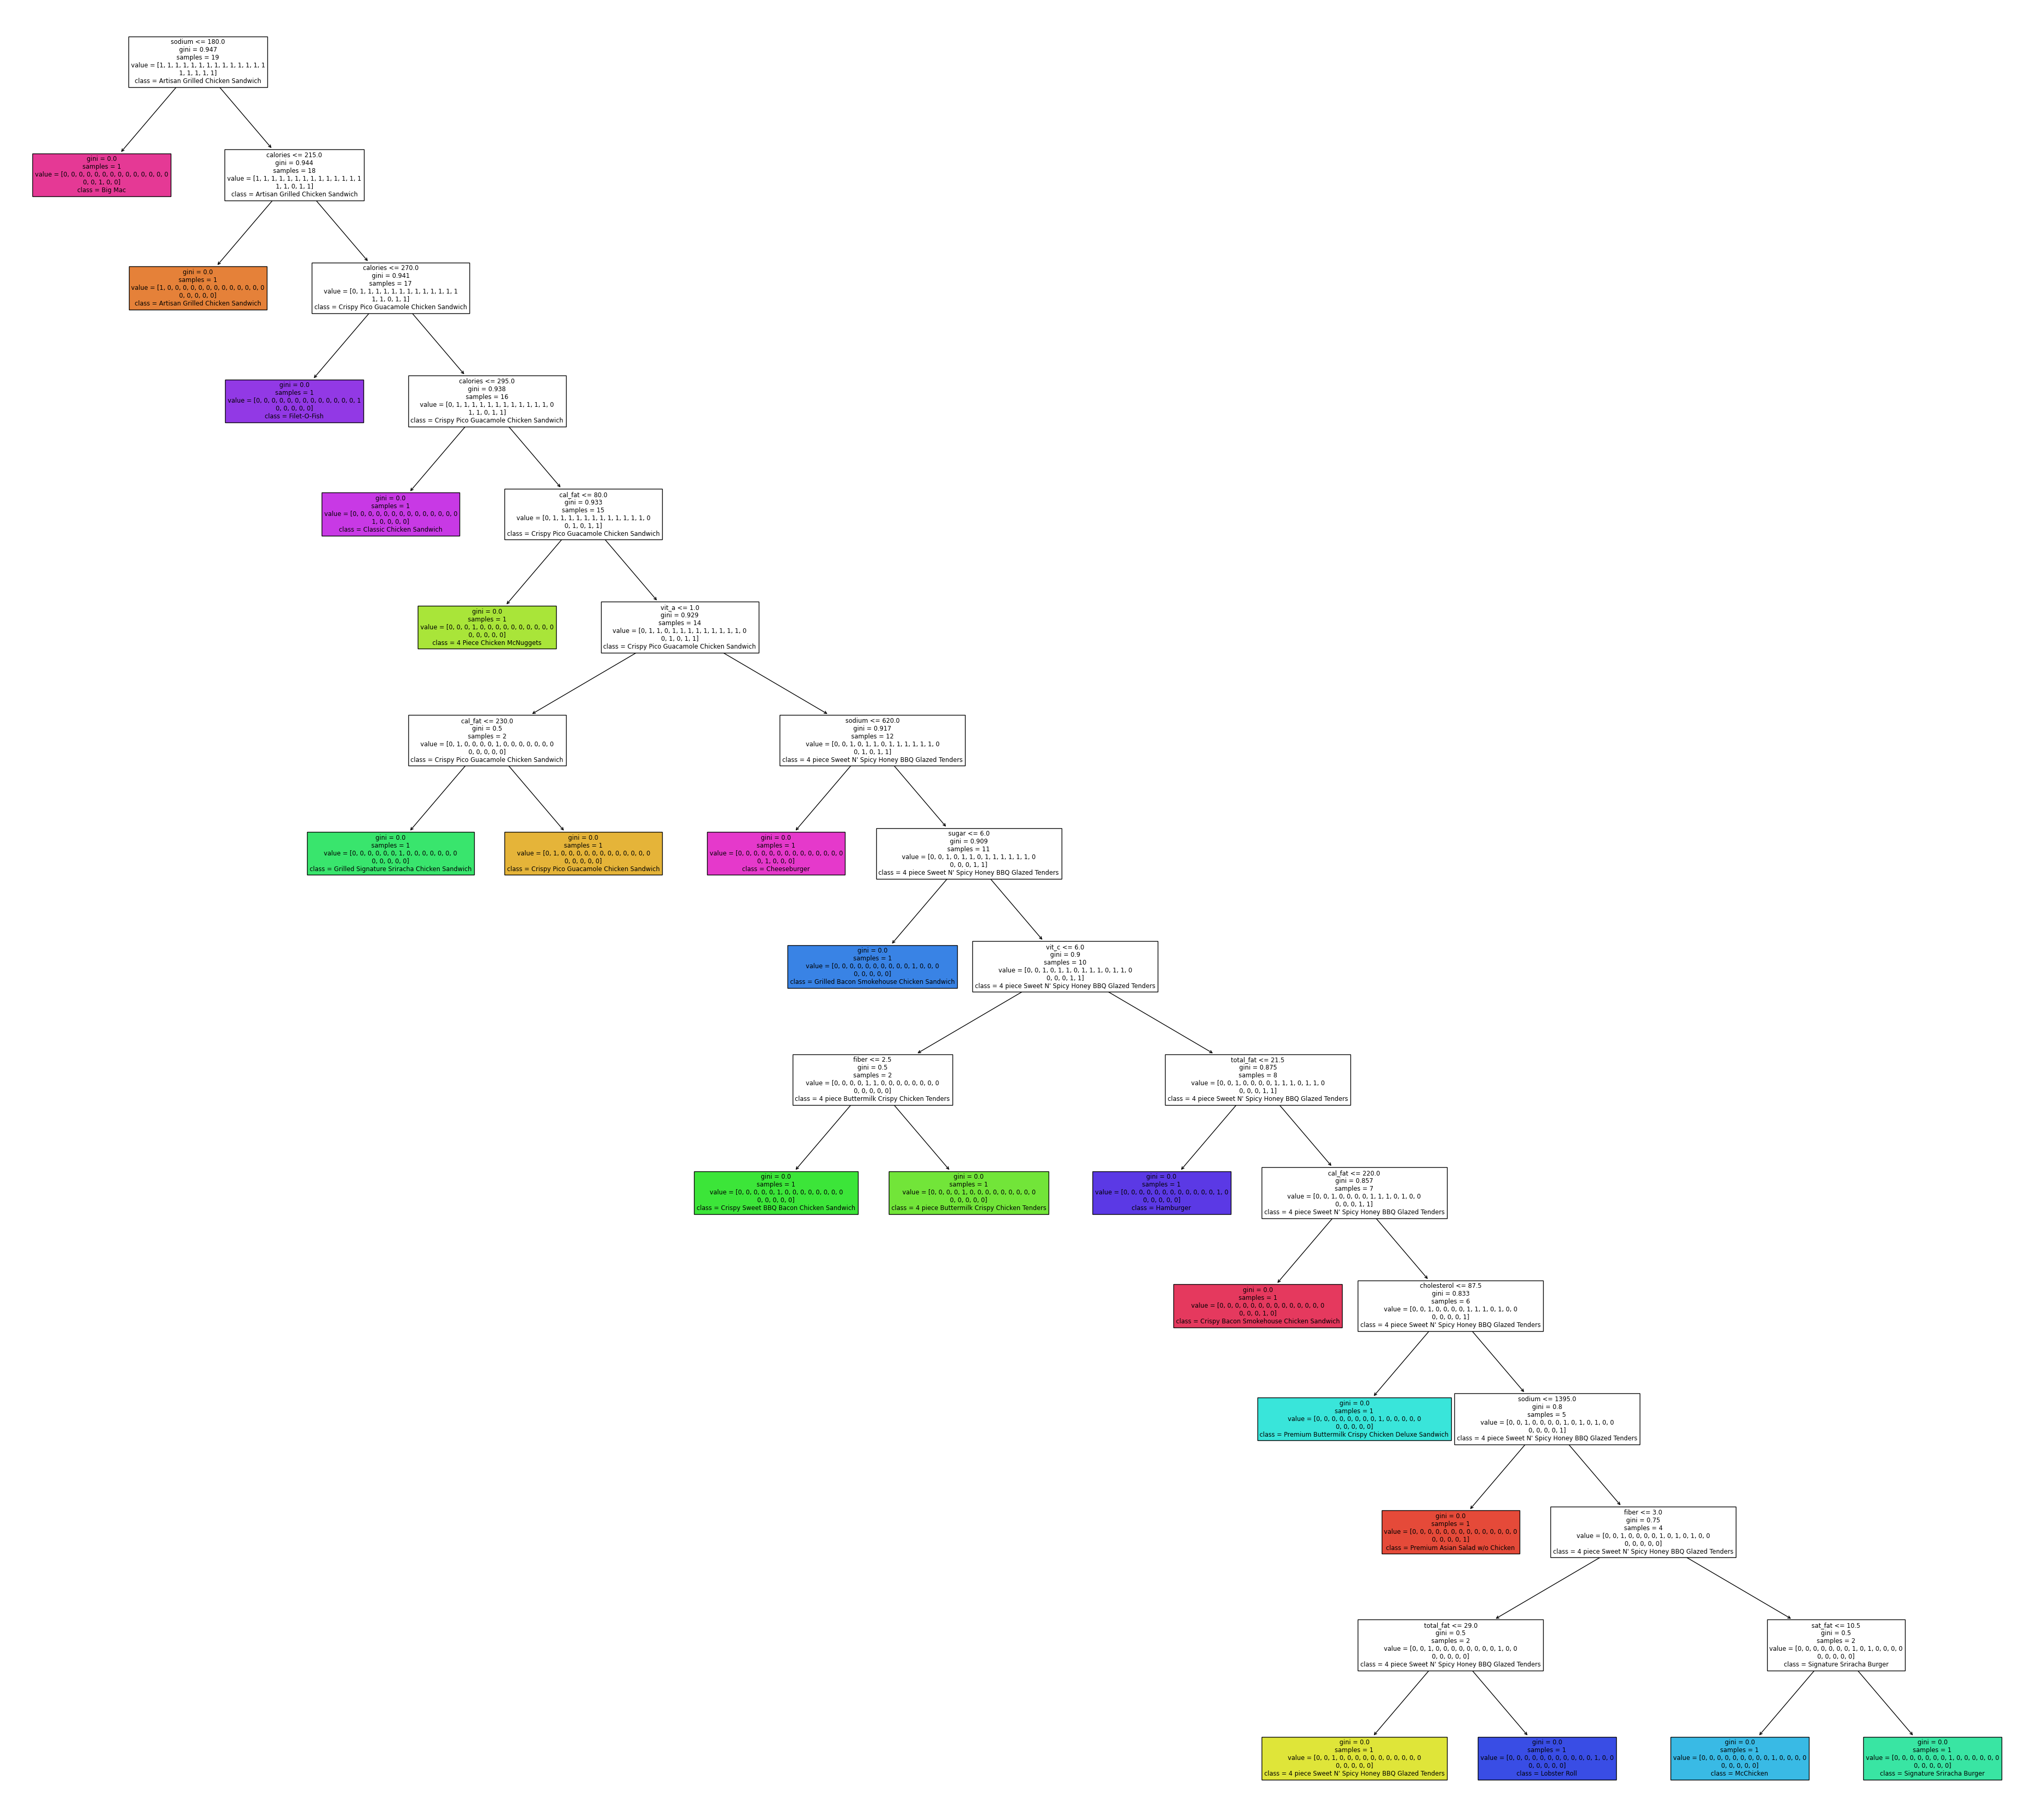

In [66]:
data = data.drop('restaurant', axis=1)
X = data.drop("item", axis=1)
Y = data['item']

recommendationTree = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=99)
recommendationModel = recommendationTree.fit(X, Y)

treeRepr = export_text(recommendationModel)
fig = plt.figure(figsize=(50, 45))

_ = plot_tree(recommendationModel,
                   feature_names=list(X.columns),
                   class_names=list(Y.value_counts().index),  # Convert to a list
                   filled=True)

Based on the decision tree's recommendations, I've identified three food items that demonstrate a notable degree of similarity: the Grilled Signature Sriracha Chicken Sandwich, Cheeseburger, and the Crispy Pico Guacamole Chicken Sandwich. These items have been clustered together in the decision tree, implying that they share common attributes or characteristics, making them suitable recommendations for someone with a preference for these particular qualities. What's intriguing is that despite their diverse flavors and appeal, the decision tree's perspective unveils an unexpected congruence among these items